In [2]:
import gym
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.layers import Dense,Conv2D,Flatten,Dropout
import keras
from collections import namedtuple
import random

Using TensorFlow backend.


In [3]:
# env = gym.make('SpaceInvaders-ramNoFrameskip-v0')
env = gym.make('TimePilotNoFrameskip-v0')
# env = gym.make("MsPacman-ramNoFrameskip-v0")
# env = gym.make('Zaxxon-v4')
# env = gym.make("VideoPinball-ramNoFrameskip-v0")

In [4]:
# print(env.action_space.n)
# print(env.observation_space)
# print(env.observation_space.high)
# print(env.observation_space.low)
print(env.observation_space.shape)

(210, 160, 3)


In [5]:
obs = env.reset()/255.0
obs = obs[32:170,:]
obs.shape

(138, 160, 3)

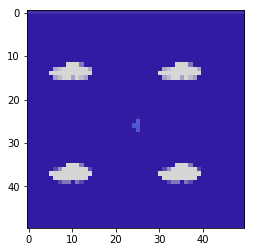

In [6]:

# obs.shape
obs=cv2.resize(obs,(50,50))
# Cropping the image
# obs = 
# obs = np.reshape(obs,(1,-1))
# obs.shape
plt.imshow(obs,cmap='gray')
plt.show()

In [7]:
def preprocess_image(obs):
    obs = obs / 255.0
    obs = cv2.resize(obs,(50,50))
    
    return obs

In [8]:
# Neural Network
model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=4, strides=2,
                 activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(filters=64, kernel_size=3, strides=1,
                 activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=env.action_space.n))
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        1568      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 3,986,410
Trainable params: 3,986,410
Non-trainable params: 0
_________________________________________________________________


In [9]:
# NOTE: Experience Replay
class Experience_Replay(object):
    def __init(self,max_size=10000000):
        self.memory  = []
        self.max_size = max_size
        self.mem_idx = 0
    def store(self,experience):
        self.memory.insert(self.mem_idx % self.max_size,experience)
        self.mem_idx +=1
    
    def sample(self,batch_size):
        assert batch_size <= len(self.memory), "Sample size is more than Memory size"
        return random.sample(self.memory,batch_size)
    def get_size(self):
        return len(self.memory)

In [10]:
# NOTE : I have to implement a method that will get batches from Experience Replay Memory and then Train NN on these batches
Memory = Experience_Replay()
def replay_experience(Memory,batch_size=50000):
    batch = Memory.sample(batch_size)
    train_on_batches(batch)
    
def train_on_batches(batch):
    pass

    

In [11]:
MAX_NUM_EPISODES = 10
MAX_STEPS_PER_EPISODES = 200
MAX_NUM_STEPS = MAX_NUM_EPISODES * MAX_STEPS_PER_EPISODES
EPSILON_MIN = 0.005
Epsilon_decacy = 500 * EPSILON_MIN / MAX_NUM_STEPS
Alpha = 0.05
Gamma = 0.98

In [ ]:
for episodes in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        obs = preprocess_image(obs)
        total_reward = 0.0
        step = 0
        while not done:
            env.render()
            obs = np.expand_dims(obs,axis=0)
            action = np.argmax(model.predict(obs))
            if step == 0:
                prev_action = action
            next_state,reward,done,_ = env.step(action)
            if action != prev_action:
                print(action)
            prev_action = action   
            total_reward += reward
            step += 1
            obs = preprocess_image(next_state)
        print('\n Episode {} ended in {} Steps.Total reward {}'.format(episodes,step,total_reward))
env.close ()